In [1]:
import tensorflow as tf


In [5]:
data_dir = 'C:/Users/Eduar/OneDrive/Documentos/GitHub/MachineLearning/Projeto/tom_and_jerry'


In [8]:
# Defina as dimensões das imagens
img_height = 180
img_width = 180
batch_size = 32

# Carregue o dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Verifique as classes
class_names = train_ds.class_names
print(class_names)

Found 3170 files belonging to 2 classes.
Using 2536 files for training.
Found 3170 files belonging to 2 classes.
Using 634 files for validation.
['jerry', 'tom']


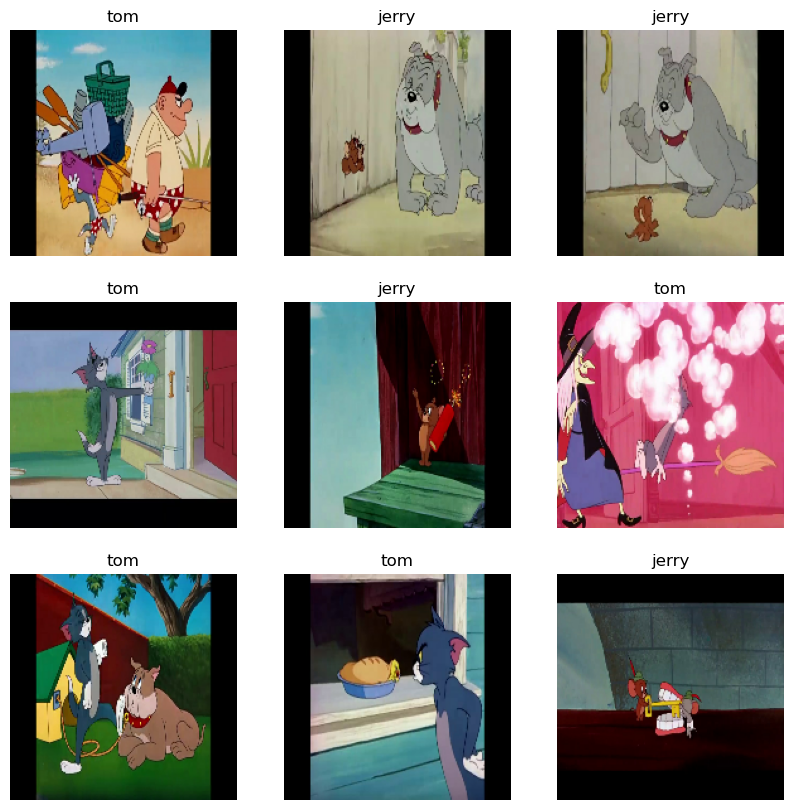

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [26]:
import numpy as np

# Extrair imagens e labels do dataset
X_train = []
y_train = []

for images, labels in train_ds:
    X_train.append(images.numpy())
    y_train.append(labels.numpy())

# Converter listas para arrays numpy
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

X_valid = []
y_valid = []

for images, labels in val_ds:
    X_valid.append(images.numpy())
    y_valid.append(labels.numpy())
    
X_valid = np.concatenate(X_valid, axis=0)
y_valid = np.concatenate(y_valid, axis=0)

# Normalizar as imagens
X_train = X_train / 255.0
y_traing = y_train / 255.0
X_train = X_train / 255
X_valid = X_valid / 255



print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(2536, 180, 180, 3)
(2536,)
(634, 180, 180, 3)
(634,)


In [30]:
#flatten the images shape
X_train = X_train.reshape(2536, 180*180*3)
X_valid = X_valid.reshape(634, 180*180*3)


X_train.shape, X_valid.shape

((2536, 97200), (634, 97200))

In [34]:
X_train[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
import tensorflow.keras as keras
num_categories = 2

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

In [47]:
model.add(Dense(units=512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units=num_categories, activation='softmax'))


In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │    49,766,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │         5,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,833,428 (193.91 MB)

 Trainable params: 50,833,428 (193.91 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(
    X_train, y_train, epochs=5, verbose=1, validation_data=(X_valid, y_valid)
)

Epoch 1/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 64s 628ms/step - accuracy: 0.6068 - loss: 0.6741 - val_accuracy: 0.6136 - val_loss: 0.6682
Epoch 2/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 49s 606ms/step - accuracy: 0.6123 - loss: 0.6701 - val_accuracy: 0.6136 - val_loss: 0.6671
Epoch 3/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 45s 557ms/step - accuracy: 0.6056 - loss: 0.6720 - val_accuracy: 0.6136 - val_loss: 0.6689
Epoch 4/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 44s 547ms/step - accuracy: 0.5966 - loss: 0.6767 - val_accuracy: 0.6136 - val_loss: 0.6698
Epoch 5/5
80/80 ━━━━━━━━━━━━━━━━━━━━ 45s 566ms/step - accuracy: 0.6099 - loss: 0.6704 - val_accuracy: 0.6136 - val_loss: 0.6685


In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


c:\Users\Eduar\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 54s 644ms/step - accuracy: 0.6636 - loss: 0.7424 - val_accuracy: 0.7603 - val_loss: 0.5704
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 50s 626ms/step - accuracy: 0.8186 - loss: 0.4268 - val_accuracy: 0.8391 - val_loss: 0.3722
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 51s 640ms/step - accuracy: 0.8905 - loss: 0.2631 - val_accuracy: 0.9196 - val_loss: 0.2199
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 53s 665ms/step - accuracy: 0.9315 - loss: 0.1763 - val_accuracy: 0.9101 - val_loss: 0.2367
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 52s 653ms/step - accuracy: 0.9667 - loss: 0.0907 - val_accuracy: 0.8975 - val_loss: 0.3533
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 50s 620ms/step - accuracy: 0.9593 - loss: 0.1143 - val_accuracy: 0.9180 - val_loss: 0.2817
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 50s 620ms/step - accuracy: 0.9868 - loss: 0.0438 - val_accuracy: 0.9243 - val_loss: 0.2505
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 49s 617ms/step - accuracy: 0.9756 - loss: 0.0599 - val_accuracy: 0.918

In [51]:
#make a confusion matrix
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_valid, axis=1), y_pred)
heatmap(cm, annot=True, xticklabels=class_names, yticklabels=class_names, ftm='d', cmap='Blues')

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 97200), dtype=float32). Expected shape (None, 180, 180, 3), but input has incompatible shape (32, 97200)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 97200), dtype=float32)
  • training=False
  • mask=None